In [1]:
#Lesson 1: Making predictions
#machine learning makes computational algorithms that can learn over time, based on experience. 
#Can detect and predict meaningful patterns.
#supervised learning the learner is trained with labelled data (and features), so when introduced to new inputs
#the learner can predict a corresponding output
import torch

In [2]:
#goal of this lesson is to generate random data and incorrectly guess a linear model (linear regression)
#then use a simple optimization algorithm called gradient descent, until the model fits the data well
#line represented by y = w*m + b. w (slope, or weight) and b (bias term) are paramteres of our line
#don't worry about why you need the gradient yet equal to true

#weight w, is 3.0 (arbitrary)
w = torch.tensor(3.0, requires_grad=True)
#bias b, is arbitrary right now 
b = torch.tensor(1.0, requires_grad=True)

In [3]:
#how to make a prediction based on a model in pytorch
#defining forward function recieves the x variable (input, independent variable) and passes 
#through the linear model y = w*x + b
def forward(x):
  #based on what we give x, then we will predict y and returned
  y = w*x + b
  return y

In [4]:
#chose an x input of 2, so the output is forward(x)
x = torch.tensor(2)
forward(x)
#model makes a prediction of 7

tensor(7., grad_fn=<AddBackward0>)

In [5]:
#can pass in many inputs, say we want 4 and 7. The forward function only recognizes one x
#so need to wrap the brackets up so it recongizes as separate inputs
x = torch.tensor([[4], [7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

In [6]:
#Lesson 2: Linear class (standard way of making linear model)
#import the linear class from the nn module
from torch.nn import Linear

In [7]:
#manual_seed sets a seed for random generation of numbers. When constructing model to linear class, it will be given
#random values for the linear class
torch.manual_seed(1)
#need to start a random variable for w and b, then train the model through gradient descent to obtain 
#optimal values

#for every prediction we make using linear model, for every output there is a single input
#by doing this, this makes a linear model 
model = Linear(in_features=1, out_features=1)
#can determine the parameters by printing
print(model.bias, model.weight)
#this is equivalent to a line with slope 0.5153 (weight) and b of -0.4414 (bias)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [8]:
#based on this model we can make a prediction from input x, remember decimals are float values
x = torch.tensor([[2.0], [3.3]])
print(model(x))
#this gives you the prediction based on the x input value, since linear model only takes a single argument
#need to use brackets

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


In [9]:
#Lesson 3: Custom Modules
#Robust and simple way of building a simple linear model (LR = linear regression) with pytorch
#this is a template for our new class
#need to also import tourch.nn and will do it with an alias
import torch
import torch.nn as nn

class LR(nn.Module):
  #LR means linear regression. Class is a template, as a blueprint for our models contruction
  #(init or) initializer methods. double underscores for contructor. Initialize new constructors for the class 
  #self is the instance of the class, object that has yet to be initialized
  #looking back on code 
    #torch.manual_seed(1)
    #model = Linear(in_features=1, out_features=1)
  #to inialize linear model, need to show that the input and output sizes
  def __init__(self, input_size, output_size):
    #to access linear class need to import torch.nn 
    super().__init__() 
    #these top 3 lines are always written to inheret from class or to make a custom class! 

    #instance of the object we want to initalize
    self.linear = nn.Linear(input_size, output_size)
    
    #To make predictions, we use the forward method. by defining forward method. Need to pass in the input x
  def forward(self, x):
    #prediction (pred) is the prediction that comes out from x that is fed in from the linear model
    pred = self.linear(x)
    return pred

In [10]:
#seed random number generator to see consistent results
torch.manual_seed(1)
#passing arguments through
#this is our linear model with input and output of 1
model = LR(1, 1)
#printing the random weight and bias values as a list to see the values better
print(list(model.parameters()))
#can make more LR models
#the weight form = 0.5153, and bias = -0.4414 as before

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [11]:
#to make predictions we use the forward method as def forward(self, x)
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))
#make two predictions based on two inputs (independent variables) with wrapping in brackets

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


In [12]:
#Lesson 4: Creating Datasets
#Before training model to fit a data. set 
#need to create a dataset and plot if we want to figure out the lienar regresssion

#load the following: 
#import torch 
#import torch.nn as nn

#to visualize our data in 2D, x and y coordinate. Each data has an x and y coordinate
import matplotlib.pyplot as plt 

#matplotlib is compatible with numpy
import numpy as np


Text(0.5, 0, 'x')

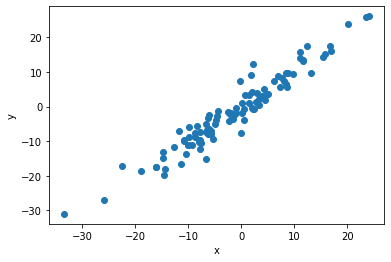

In [13]:
#returns a tensor filled with random numbers that are normally distributed, this function accepts a sequence of integers
#that describes the shape of our tensor. (100 rows and 1 column) 100 point with 1 single value within normal distribution
#They're centered around zero with a small variance. So to multiply with 10 to make a larger range
x = torch.randn(100, 1)*10
#y right now is a function of x 
y = x + 3*torch.randn(100,1)
#plot the tensors as numpy array. 
#to make the point show up as a circle use letter 'o'
plt.plot(x.numpy(), y.numpy(), 'o')

#fitting linear model with linear data is easy, so adding noise by adding noise to the y value by adding
#random values or noise to it (that is the random added to the x)

#label the axis
plt.ylabel('y')
plt.xlabel('x')

In [14]:
#now to train a model to fit the data set, which before we already wrote the code to create a model
#it has random weight and bias models already assigned to it by a linear model. 
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [15]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [16]:
#unpacking parameters
[w, b] = model.parameters()

#obtaining as a tensor type, but when type .item we get a python number for the tensors and give the parameters
#w1 = w[0][0].item()
#b1 = b[0].item()
#print(w1, b1)

#will return the numbers as a tuple instead. To make it into a function instead
def get_params():
    return (w[0][0].item(), b[0].item())



In [17]:
#now going to plot the model along the data points
def plot_fit(title):
    plt.title = title
    #since matplot is most cmpatible to numpy so we're going to import numpy as np
    #determine numerical expressions for x1 and y1
    #set w1, b1 equal to their return values of get_param
    w1, b1 = get_params()
    #x axis seems to go from =30 to 30. Make sure it's an array and not a tensor to be compatible with pyplot
    x1 = np.array([-30, 30])
    #getting 2 y points. Will give points at -30 and then 30 which is connected by a line
    y1 = w1*x1 + b1
    #r plots red
    plt.plot(x1, y1, 'r')
    #also want to plot scatter plot
    plt.scatter(x, y)
    #showing our plot
    plt.show()

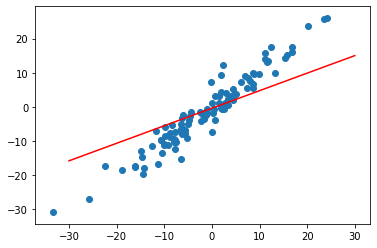

In [18]:
plot_fit('Initial Model')

#now we can clearly see that the linear model doesn't fit the data very well. 
#we need gradient descent to update its parameters 

In [19]:
#Lesson 5: Loss function
#goal is to find parameters of the line that fits the data well...so we need an optimization algorithm that
#will adjust the parameters based on the total error.

#Whatever line chosen, the error is the prediction subtracted from the actual value: (actual - prediction)^2
#the prediction can be written as wx+b. (y - wx+ b)^2

#Looking at a single point, an infinite number of lines can be drawn through it, so we can remove bias 
#(y-intercept) for now and fix it at zero. (y - wx + 0)^2 ==> (y - wx)^2
#optimal line will have a weight that will minimize the error as much as possible (close to zero)

#Smaller the space between the line and the actual value corresponds to the error
#error vs weight will look like a parabola, where the optimal value is the minimum that
#gives the lowest error

#how to train a model to figure out the weight parameters that will minimize corespond to the smallest error?

In [20]:
#Lesson 6: Gradient Descent 
#there are weight parameters that will yield the smallest error, to determine the weight parameters
#we use gradient descent. Linear model will start with random inital parameters. 
#based on the associated error with that initial value, then move in the direction that gives the smallest error
#If we take the gradient, the derivative, the slope of the tangent at the current value
#the derivative will take in the direction towards the highest error

#so need to move in negative gradient direction to the lowest error. Take the current weight and 
#subtract the derivative of the function at that same point. 
#w1 = w0 - f'(w) ==> the new weight 

#1. Compute derivative of loss function, which is the error between actual and predition squared f = (y - wx)^2
#2. Substitute the current weight value to get f'(w)
#3. Gradient value (or derivative) is then subtracted from the current weight w0 to give a new weight w1
#4. Repeat until obtain a small error (optimal parameters for the linear model to fit data)

#Need to descend in small steps to not overshoot the minimum. Which means we will multiply the gradient
#by a learning rate (alpha) ==> w1 = w0 - (alpha)*f'(w)

#this is an effective way to train our model. To figure out the weights needed to make the smallest error

In [21]:
#Lesson 7: Mean Squared Error

#Similar to general loss equation...but we need to include the bias value. 


In [22]:
#Lesson 8: Training - Code Implementation
#need to specify loss function that we need to minimize. There is a built in loss function in pytorch.
#store mean squared loss is stored as a variale called criterion 
criterion = nn.MSELoss()

#optimizer will update parameters. Implement stochastic gradient descent...which is not similar to batch gradient descent
#batch gradient descent will computes gradient with all the points, based on sum of accumulated errors for every point, every iteration
#Stochastic will reach convergence faster - minimize the total loss one sample at a time. More frequently update weights
#Specifiy which model parameters we want to optimize, and set lr = learning rate, want it to be samll so we don't have 
#divergent behavior in optimization. Usually 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [23]:
#will train model for a specified number of epochs. Epoch is whenever we pass through the entire data set once
#calcualte error function and backpropogate the gradient of the error function to update the weight

#if we use too few epochs then we get underfitting. If we use too many we can get overfitting (but won't be a problem
#in this case...)

epochs = 100
#set a list to an empty list so we can append each loss to the list
losses = []
for i in range(epochs):
    #each x value we use a prediction with the forward method
    y_pred = model.forward(x)
    #find the error between the predicted value y and actual y
    loss = criterion(y_pred, y)
    #to see the loss associated with each epoch
    print("epoch:", i, "loss:", loss.item())
    
    losses.append(loss)
    #need to set gradient to zero because gradients accumulate with the .backward method
    optimizer.zero_grad()
    #now to take gradient descent
    loss.backward()
    #all optimizers use the step method
    optimizer.step()

epoch: 0 loss: 36.448333740234375
epoch: 1 loss: 25.847068786621094
epoch: 2 loss: 19.274919509887695
epoch: 3 loss: 15.200481414794922
epoch: 4 loss: 12.674422264099121
epoch: 5 loss: 11.108229637145996
epoch: 6 loss: 10.137073516845703
epoch: 7 loss: 9.53479290008545
epoch: 8 loss: 9.161184310913086
epoch: 9 loss: 8.92933464050293
epoch: 10 loss: 8.785365104675293
epoch: 11 loss: 8.695876121520996
epoch: 12 loss: 8.640158653259277
epoch: 13 loss: 8.605379104614258
epoch: 14 loss: 8.583581924438477
epoch: 15 loss: 8.569830894470215
epoch: 16 loss: 8.56106948852539
epoch: 17 loss: 8.555403709411621
epoch: 18 loss: 8.551655769348145
epoch: 19 loss: 8.549100875854492
epoch: 20 loss: 8.547282218933105
epoch: 21 loss: 8.545923233032227
epoch: 22 loss: 8.54485034942627
epoch: 23 loss: 8.54395580291748
epoch: 24 loss: 8.543170928955078
epoch: 25 loss: 8.542455673217773
epoch: 26 loss: 8.541786193847656
epoch: 27 loss: 8.541145324707031
epoch: 28 loss: 8.540521621704102
epoch: 29 loss: 8.5399

Text(0.5, 0, 'epoch')

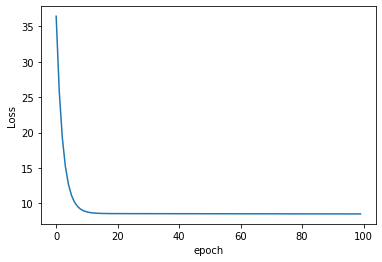

In [24]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

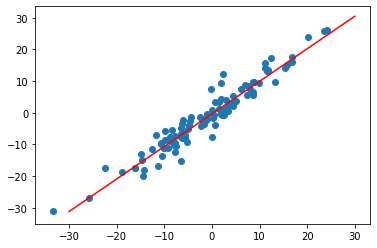

In [25]:
plot_fit("Trained Model")